In [2]:
import pandas as pd
import numpy as np
import seaborn as sna
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r'C:\Users\91735\Documents\python assignment\as2\ecommerce.csv')

In [4]:
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12-09-2011 12:50,4.95,12680.0,France


In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 1. Perform Basic EDA

### a. Boxplot – All Numeric Variables 


In [89]:
#plt.boxplot(data['Quantity'],notch=False )
#data['UnitPrice'].value_counts().idxmax()
data['Quantity'].min()

1

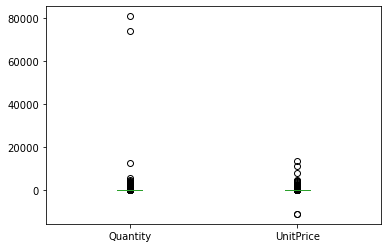

In [293]:


data[['Quantity','UnitPrice']].plot.box()
plt.show()

### b. Histogram – All Numeric Variables

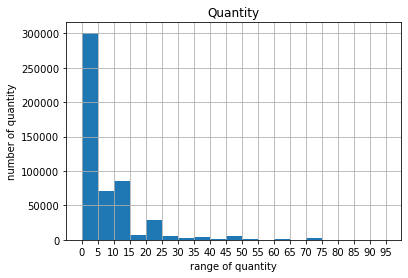

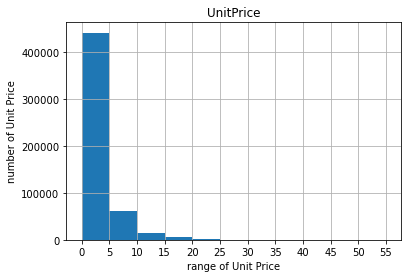

In [108]:
bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
data.hist(['Quantity'],bins=bins)
plt.xticks(bins)
plt.xlabel('range of quantity')
plt.ylabel('number of quantity')
plt.show()
bins=[0,5,10,15,20,25,30,35,40,45,50,55]
data.hist(['UnitPrice'],bins=bins)
plt.xticks(bins)
plt.xlabel('range of Unit Price')
plt.ylabel('number of Unit Price')
plt.show()

In [109]:
#data.loc[(data['Quantity']>0)&(data['Quantity']<10)].count()

### d. Aggregation for all numerical Columns


In [11]:
data.aggregate({"UnitPrice":['sum','min','max'],
             "Quantity":['sum','min','max']})

,UnitPrice,Quantity
sum,2498803.974,5176450
min,-11062.060,-80995
max,38970.000,80995


### e. Unique Values across all columns

In [5]:
for col in data:
    print(data[col].unique())

['536365' '536366' '536367' ... '581585' '581586' '581587']
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -2

### f. Duplicate values across all columns

In [58]:
# Select duplicate rows except first occurrence based on all columns
duplicateRows = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRows)

Duplicate Rows except first occurrence based on all columns are :
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

             InvoiceDate  UnitPri

### g. Correlation – Heatmap - All Numeric Variables

<AxesSubplot:>

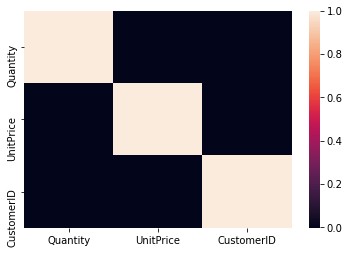

In [20]:
import seaborn as sns
%matplotlib inline
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### h. Regression Plot - All Numeric Variables

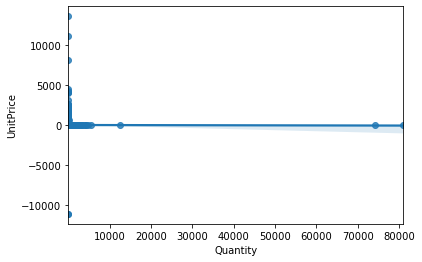

In [344]:
#r=data.groupby('Quantity')['UnitPrice']
#r.plot(kind='reg')
sna.regplot(x='Quantity', y='UnitPrice', data=data)
plt.show()

###  i. Bar Plot – Every Categorical Variable vs every Numerical Variable

<AxesSubplot:xlabel='Country'>

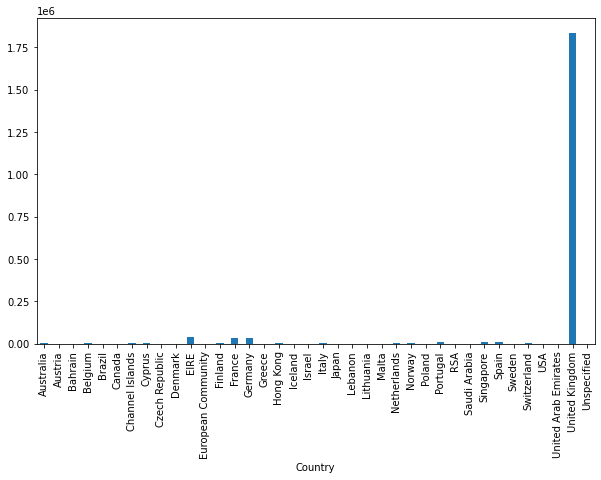

In [356]:
bar=data.groupby('Country')['UnitPrice'].sum()
plt.subplots(figsize=(10,6))
bar.plot(kind='bar')
#data.tail()

#data.groupby('Country')['UnitPrice']
#a=data.groupby('Country')['UnitPrice'].plot(kind='bar')
#data['count']=1
#data.groupby(['Country']).count()['count']
#print(data.pivot(columns='Country',values='UnitPrice'))
#plt.bar(data.groupby(['Country']),['UnitPrice'])
#import matplotlib.pyplot as plt
#plt.bar("Country", data = data, color = "blue")
#plt.show()
#print(grouped) 

### j. Pair plot - All Numeric Variables

In [ ]:
sna.pairplot(data,vars=['Quantity','UnitPrice'],kind='reg')
plt.grid()
plt.show()

KeyboardInterrupt: 

## 2. Check for missing values in all columns and replace them with the appropriate metric 
(Mean/Median/Mode)

In [169]:
#data_nan=data[data.isna().any(axis=1)]
#data_nan.head()

In [76]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [21]:
data.fillna(data['UnitPrice'].mean())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [1]:
data.head()

NameError: name 'data' is not defined

## 3. Remove duplicate rows

In [77]:
duplicated_rows=data.duplicated()
if True in duplicated_rows:
    data=data[~duplicated_rows]
print('removed {} duplicate values'.format(np.where(duplicated_rows==True)[0].size))

removed 5268 duplicate values


## 4. Remove rows which have negative values in Quantity column

In [82]:
data=data[data.Quantity>0]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


## 5. Add the columns - Month, Day and Hour for the invoice

In [163]:
data.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,1,12
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,1,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,1,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,1,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,1,12
...,...,...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,12-01-2010 09:37,2.55,14688.0,United Kingdom,1,12
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,12-01-2010 09:37,0.42,14688.0,United Kingdom,1,12
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,12-01-2010 09:37,0.55,14688.0,United Kingdom,1,12
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,12-01-2010 09:37,0.55,14688.0,United Kingdom,1,12


In [202]:
data['month']=data['InvoiceDate'].str[0:2]

In [203]:
data.loc[data['month']=='1/','month']='01'
data.loc[data['month']=='2/','month']='02'
data.loc[data['month']=='3/','month']='03'
data.loc[data['month']=='4/','month']='04'
data.loc[data['month']=='5/','month']='05'
data.loc[data['month']=='6/','month']='06'
data.loc[data['month']=='7/','month']='07'
data.loc[data['month']=='8/','month']='08'
data.loc[data['month']=='9/','month']='09'

In [212]:
def_date=data[data['InvoiceDate'].str[0:2]=='10']
def_date.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count,month
370931,569203,79321,CHILLI LIGHTS,48,10-02-2011 10:32,4.95,16353.0,United Kingdom,1,10
370932,569203,21154,RED RETROSPOT OVEN GLOVE,20,10-02-2011 10:32,1.25,16353.0,United Kingdom,1,10
370933,569204,21790,VINTAGE SNAP CARDS,4,10-02-2011 10:43,0.85,16591.0,United Kingdom,1,10
370934,569204,23284,DOORMAT KEEP CALM AND COME IN,15,10-02-2011 10:43,7.08,16591.0,United Kingdom,1,10
370935,569204,23355,HOT WATER BOTTLE KEEP CALM,4,10-02-2011 10:43,4.95,16591.0,United Kingdom,1,10
370936,569204,22207,FRYING PAN UNION FLAG,2,10-02-2011 10:43,4.25,16591.0,United Kingdom,1,10
370937,569204,22111,SCOTTIE DOG HOT WATER BOTTLE,2,10-02-2011 10:43,4.95,16591.0,United Kingdom,1,10
370938,569204,22112,CHOCOLATE HOT WATER BOTTLE,3,10-02-2011 10:43,4.95,16591.0,United Kingdom,1,10
370939,569204,22835,HOT WATER BOTTLE I AM SO POORLY,2,10-02-2011 10:43,4.95,16591.0,United Kingdom,1,10
370940,569204,22476,EMPIRE UNION JACK TV DINNER TRAY,6,10-02-2011 10:43,4.95,16591.0,United Kingdom,1,10


In [218]:
#data.insert(loc=1,column='month',value=data.InvoiceDate.dt.month)
#data['month']=data['InvoiceDate'].str[0:2]
data['month']=data['month'].astype('int32')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,1,12
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,1,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,1,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,1,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,1,12


In [323]:
data['InvoiceDate']=pd.to_datetime(data.InvoiceDate)

In [339]:
data['year']=data['InvoiceDate'].dt.year
data['hour']=data['InvoiceDate'].dt.hour
data['day']=data['InvoiceDate'].dt.day
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count,month,sales,hour,day,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,15.30,8,1,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,20.34,8,1,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,22.00,8,1,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,20.34,8,1,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,20.34,8,1,2010


In [334]:
#data['months']=data['InvoiceDate'].dt.month
#data.tail()

## 6. How many orders made by the customers?

In [309]:
#data.drop(columns=['count'])
#data.groupby('CustomerID').sum()['count']

om=data.groupby(['CustomerID']).count()['count'].sort_values(ascending=False)
om

CustomerID
17841.0    7676
14911.0    5672
14096.0    5111
12748.0    4413
14606.0    2677
           ... 
15524.0       1
15562.0       1
15657.0       1
15668.0       1
12346.0       1
Name: count, Length: 4339, dtype: int64

## 7. TOP 5 customers with higher number of orders

In [310]:
om.head(5)

CustomerID
17841.0    7676
14911.0    5672
14096.0    5111
12748.0    4413
14606.0    2677
Name: count, dtype: int64

## 8. How much money spent by the customers?

#### Adding a sales column 


In [223]:
data['sales']=data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count,month,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,1,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,1,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,1,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,1,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,1,12,20.34


In [236]:
#results=data.groupby('CustomerID').sum()
#results=data.groupby('month').sum()

In [306]:
cu=data.groupby('CustomerID').sum()['sales'].sort_values(ascending=False)
cu

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
             ...    
17956.0        12.75
16454.0         6.90
14792.0         6.20
16738.0         3.75
13256.0         0.00
Name: sales, Length: 4339, dtype: float64

## 9. TOP 5 customers with highest money spent

In [307]:
cu.head(5)

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
Name: sales, dtype: float64

## 10. How many orders per month?

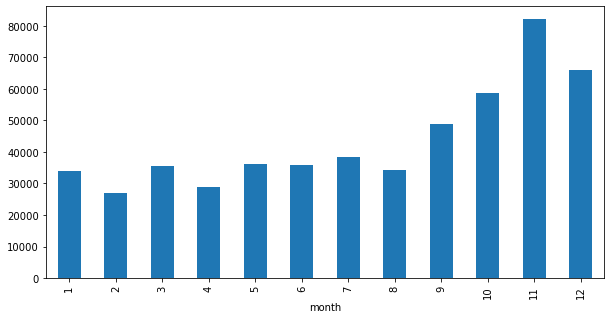

month
1     34104
2     26961
3     35609
4     28957
5     36044
6     35793
7     38466
8     34347
9     48962
10    58629
11    82133
12    66049
Name: InvoiceNo, dtype: int64

In [351]:
m=data.groupby('month')['InvoiceNo'].count()
plt.subplots(figsize=(10,5))
m.plot(kind='bar')
m.x_ticks=['dec','jan','feb','march','ap','may','jun','ju7ly','aug','sep','oct','nov']
m.ylabel=('No of Orders ')
m.xlabel=('month')
plt.show()
m

## 11. How many orders per day?

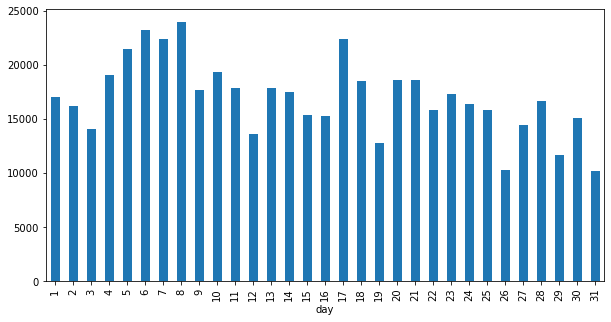

day
1     17035
2     16232
3     14049
4     19026
5     21467
6     23248
7     22350
8     23935
9     17658
10    19334
11    17891
12    13618
13    17845
14    17489
15    15344
16    15217
17    22361
18    18522
19    12757
20    18603
21    18602
22    15785
23    17306
24    16331
25    15797
26    10246
27    14448
28    16676
29    11663
30    15069
31    10150
Name: InvoiceNo, dtype: int64

In [350]:
d=data.groupby('day')['InvoiceNo'].count()
plt.subplots(figsize=(10,5))
d.plot(kind='bar')
plt.ylabel=('No of Orders ')
plt.xlabel=('day')
plt.show()
d

## 12. How many orders per hour?

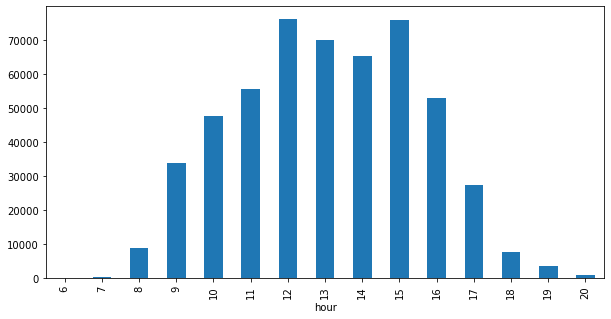

hour
6         1
7       379
8      8802
9     33738
10    47670
11    55592
12    76096
13    70067
14    65384
15    75851
16    53074
17    27498
18     7696
19     3428
20      778
Name: InvoiceNo, dtype: int64

In [338]:
h=data.groupby('hour')['InvoiceNo'].count()
plt.subplots(figsize=(10,5))
h.plot(kind='bar')
plt.ylabel=('No of Orders ')
plt.xlabel=('hour')
plt.show()
h

## 13. How many orders for each country?

In [264]:
#country=data.Country.unique()
#country

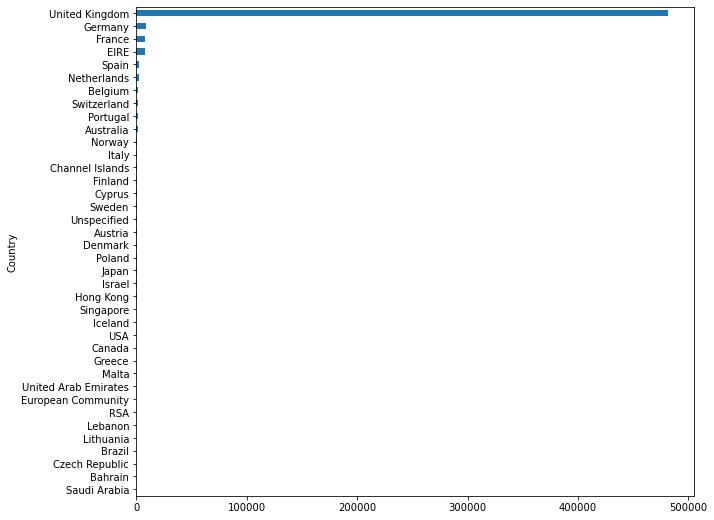

Country
Saudi Arabia                 9
Bahrain                     18
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Hong Kong                  280
Israel                     292
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Unspecified                442
Sweden                     450
Cyprus                     603
Finland                    685
Channel Islands            747
Italy                      758
Norway                    1072
Australia                 1184
Portugal                  1492
Switzerland               1959
Belgium                   2031


In [301]:
c=data.groupby('Country')['InvoiceNo'].count().sort_values()
plt.subplots(figsize=(10,9))
c.plot(kind='barh')
plt.ylabel=('No of Orders ')
plt.xlabel=('country')
plt.show()
c


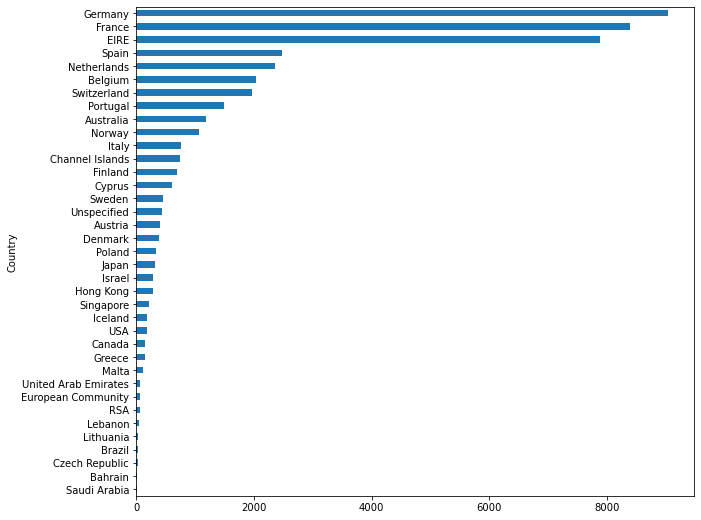

In [287]:
#money spend by countries excluding United Kingdom
c2=data.groupby('Country')['InvoiceNo'].count().sort_values()
del c2['United Kingdom']
plt.subplots(figsize=(10,9))
c2.plot(kind='barh')
plt.ylabel=('No of Orders ')
plt.xlabel=('country')

## 14. Orders trend across months

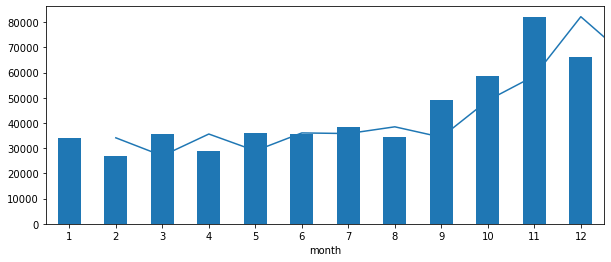

In [313]:
o=data.groupby('month')['InvoiceNo'].count()
plt.subplots(figsize=(10,4))
o.plot(kind='bar')
o.plot()
plt.ylabel=('No of Orders ')
plt.xlabel=('Month')

In [294]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count,month,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,1,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,1,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,1,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,1,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,1,12,20.34


## 15. How much money spent by each country?

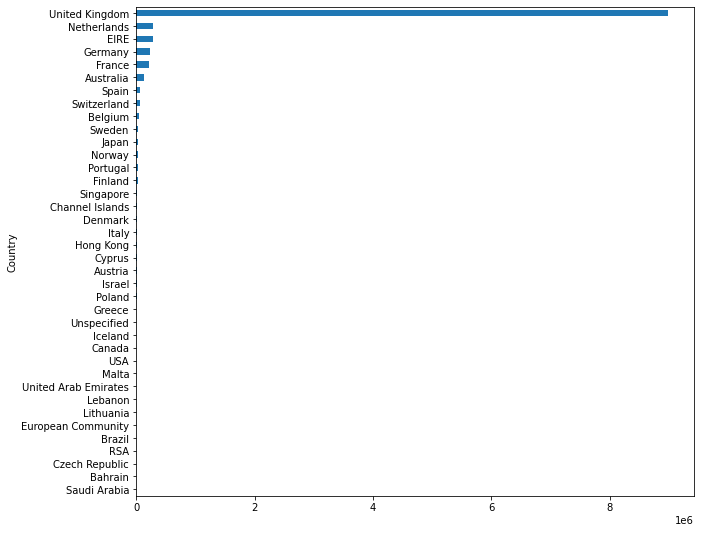

Country
Saudi Arabia            1.459200e+02
Bahrain                 7.541400e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Unspecified             4.740940e+03
Greece                  4.760520e+03
Poland                  7.334650e+03
Israel                  8.129410e+03
Austria                 1.019868e+04
Cyprus                  1.350285e+04
Hong Kong               1.548300e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.044054e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.368305e+04
Norway                  3.6165

In [302]:
co=data.groupby('Country').sum()['sales'].sort_values()
plt.subplots(figsize=(10,9))
co.plot(kind='barh')
plt.ylabel=('No of Orders ')
plt.xlabel=('country')
plt.show()
co


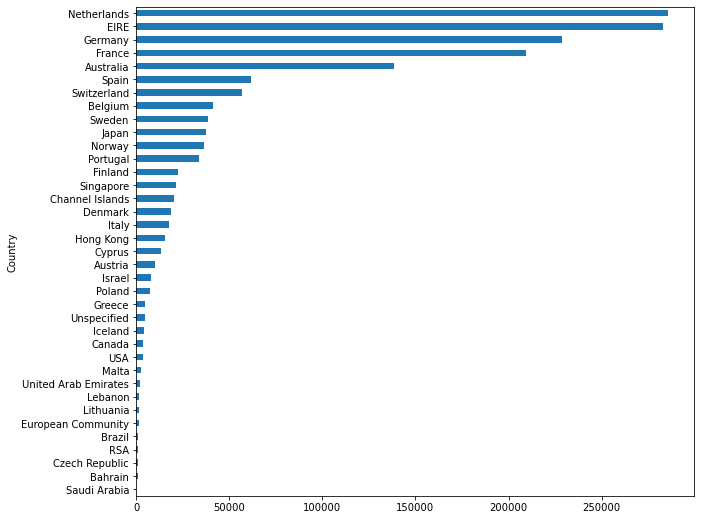

In [292]:
#money spend by countries excluding United Kingdom
co2=data.groupby('Country').sum()['sales'].sort_values()
del co2['United Kingdom']
plt.subplots(figsize=(10,9))
co2.plot(kind='barh')
plt.ylabel=('No of Orders ')
plt.xlabel=('country')